### 1. Import libraries and load dataset 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
data=pd.read_csv('Food_Inspections.csv')
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [ ]:
data.shape

(153810, 17)

In [ ]:
data.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    153810 non-null  int64  
 1   DBA Name         153810 non-null  object 
 2   AKA Name         151267 non-null  object 
 3   License #        153795 non-null  float64
 4   Facility Type    149250 non-null  object 
 5   Risk             153744 non-null  object 
 6   Address          153810 non-null  object 
 7   City             153651 non-null  object 
 8   State            153802 non-null  object 
 9   Zip              153712 non-null  float64
 10  Inspection Date  153810 non-null  object 
 11  Inspection Type  153809 non-null  object 
 12  Results          153810 non-null  object 
 13  Violations       123012 non-null  object 
 14  Latitude         153266 non-null  float64
 15  Longitude        153266 non-null  float64
 16  Location         153266 non-null  obje

In [ ]:
data.describe(include='all')

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
count,1.538100e+05,153810,151267,1.537950e+05,149250,153744,153810,153651,153802,153712.000000,153810,153809,153810,123012,153266.000000,153266.000000,153266
unique,NaN,24685,23591,NaN,447,4,17017,57,1,NaN,1946,108,7,121916,NaN,NaN,15908
top,NaN,SUBWAY,SUBWAY,NaN,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,NaN,11/14/2013,Canvass,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,NaN,NaN,"(42.008536400868735, -87.91442843927047)"
freq,NaN,2142,2575,NaN,101230,107351,1876,153090,153802,NaN,185,81712,90506,34,NaN,NaN,1884
mean,1.238655e+06,NaN,NaN,1.517483e+06,NaN,NaN,NaN,NaN,NaN,60629.004795,NaN,NaN,NaN,NaN,41.879852,-87.676471,NaN
std,5.582027e+05,NaN,NaN,8.799955e+05,NaN,NaN,NaN,NaN,NaN,22.605480,NaN,NaN,NaN,NaN,0.081235,0.058835,NaN
min,4.424700e+04,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,60007.000000,NaN,NaN,NaN,NaN,41.644670,-87.914428,NaN
25%,6.643452e+05,NaN,NaN,1.139359e+06,NaN,NaN,NaN,NaN,NaN,60614.000000,NaN,NaN,NaN,NaN,41.829990,-87.708000,NaN
50%,1.361446e+06,NaN,NaN,1.914680e+06,NaN,NaN,NaN,NaN,NaN,60625.000000,NaN,NaN,NaN,NaN,41.891405,-87.666901,NaN
75%,1.578391e+06,NaN,NaN,2.153526e+06,NaN,NaN,NaN,NaN,NaN,60643.000000,NaN,NaN,NaN,NaN,41.939409,-87.634603,NaN


### 2. Check number of Null values 

In [ ]:
#data.isnull().sum()
non_null_counts = data.count()
missing_values = data.isnull()
missing_counts = missing_values.sum()
total_counts = len(data)
missing_percentages = (missing_counts / total_counts) * 100
missing_percentages_rounded = missing_percentages.round(2)
missing_data = pd.DataFrame({'Column Name': missing_counts.index, 'Null Values': missing_counts.values, 'Percentage of Null Values': missing_percentages_rounded.values, 'Non-Null Values': non_null_counts.values})

print('Number of null values in each column: ')
print(missing_data)

Number of null values in each column: 
        Column Name  Null Values  Percentage of Null Values  Non-Null Values
0     Inspection ID            0                       0.00           153810
1          DBA Name            0                       0.00           153810
2          AKA Name         2543                       1.65           151267
3         License #           15                       0.01           153795
4     Facility Type         4560                       2.96           149250
5              Risk           66                       0.04           153744
6           Address            0                       0.00           153810
7              City          159                       0.10           153651
8             State            8                       0.01           153802
9               Zip           98                       0.06           153712
10  Inspection Date            0                       0.00           153810
11  Inspection Type            1     

### 3. Check number of unique values 

In [ ]:
print('Number of unique values in each column: ')
print(data.nunique().sort_values(ascending=False))

Number of unique values in each column: 
Inspection ID      153810
Violations         121916
License #           32850
DBA Name            24685
AKA Name            23591
Address             17017
Longitude           15908
Latitude            15908
Location            15908
Inspection Date      1946
Facility Type         447
Inspection Type       108
Zip                   100
City                   57
Results                 7
Risk                    4
State                   1
dtype: int64


### 4. Top 10 Values in Each Column

In [ ]:
df = data.drop(['Inspection ID', 'State', 'Zip','Latitude', 'Longitude'], axis=1)
 # Loop through each column in the DataFrame
topN = 10
for column in df.columns:
    # Get the 10 most common values in the column
    top_values = df[column].value_counts().head(topN)
    # Print the column name and the top values
    print(f"Top {topN} values for column '{column}':\n{top_values}\n")

Top 10 values for column 'DBA Name':
SUBWAY                         2142
DUNKIN DONUTS                  1090
MCDONALD'S                      476
7-ELEVEN                        373
MCDONALDS                       278
CHIPOTLE MEXICAN GRILL          256
POTBELLY SANDWICH WORKS LLC     219
CORNER BAKERY CAFE              192
POTBELLY SANDWICH WORKS         184
SPORTSERVICE SOLDIER FIELD      176
Name: DBA Name, dtype: int64

Top 10 values for column 'AKA Name':
SUBWAY                          2575
DUNKIN DONUTS                   1079
7-ELEVEN                         598
MCDONALD'S                       563
MCDONALDS                        286
CHIPOTLE MEXICAN GRILL           263
BURGER KING                      253
DUNKIN DONUTS/BASKIN ROBBINS     235
CITGO                            225
STARBUCKS COFFEE                 215
Name: AKA Name, dtype: int64

Top 10 values for column 'License #':
0.0          439
1354323.0    198
14616.0      172
1574001.0     79
1974745.0     58
1490035.0    

Text(0.5, 0, 'counts')

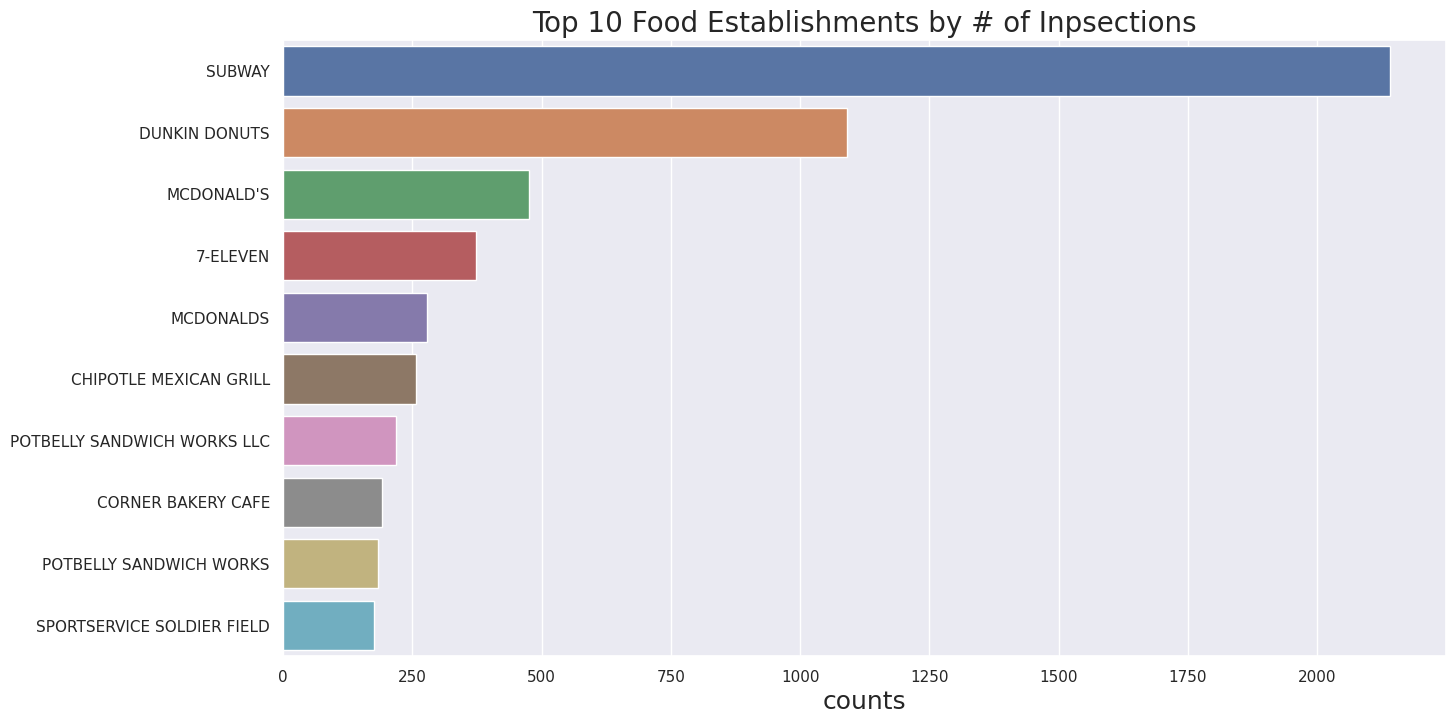

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,8))
sns.barplot(x=data['DBA Name'].value_counts()[:10],y=data['DBA Name'].value_counts()[:10].index,ax=ax)
ax.set_title("Top 10 Food Establishments by # of Inpsections",size=20)
ax.set_xlabel('counts',size=18)

Text(0.5, 0, 'counts')

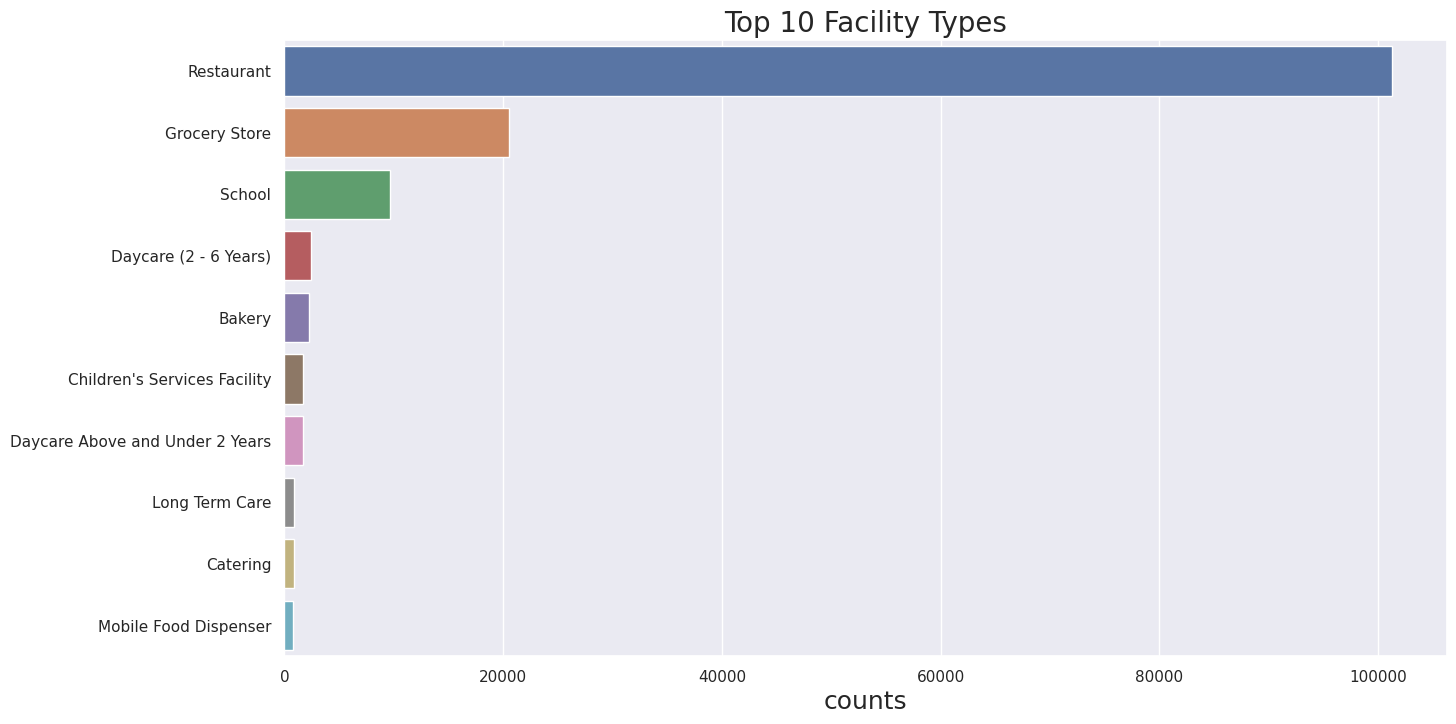

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,8))
sns.barplot(x=data['Facility Type'].value_counts()[:10],y=data['Facility Type'].value_counts()[:10].index,ax=ax)
ax.set_title("Top 10 Facility Types",size=20)
ax.set_xlabel('counts',size=18)

Text(0.5, 0, 'counts')

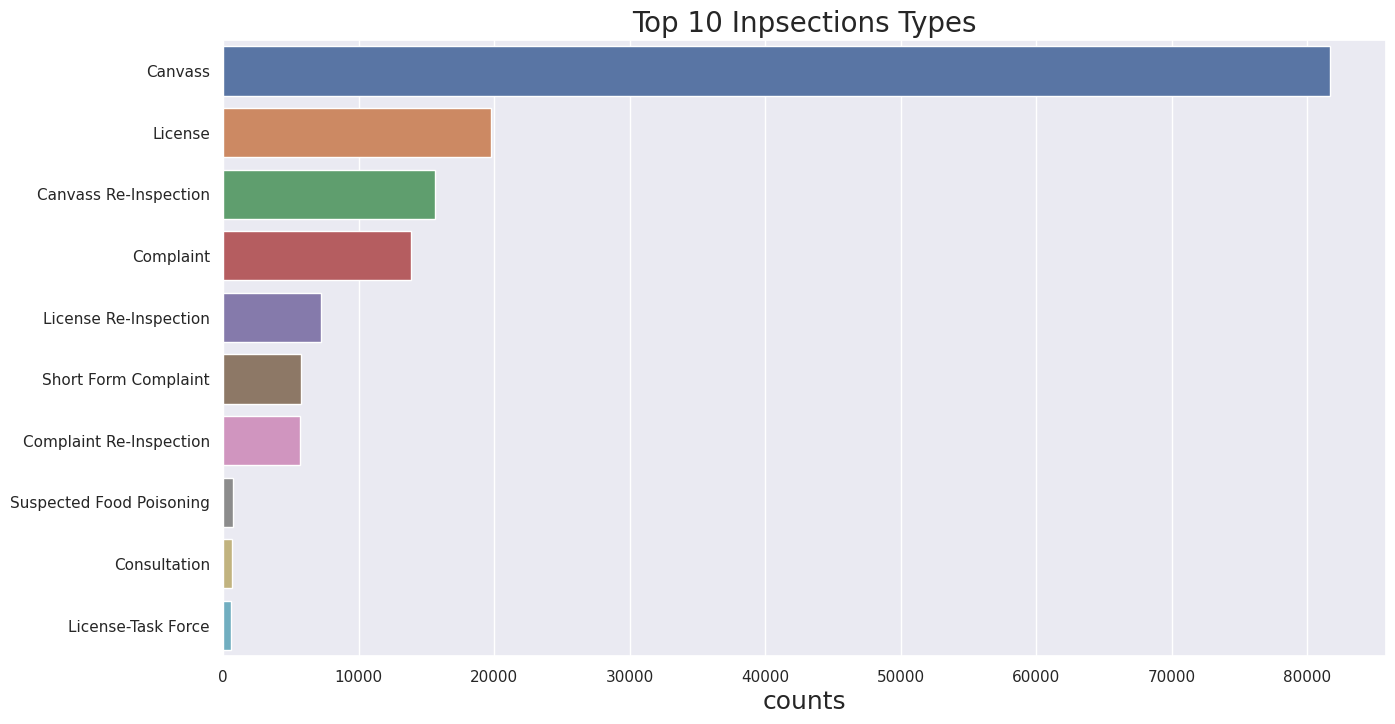

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,8))
sns.barplot(x=data['Inspection Type'].value_counts()[:10],y=data['Inspection Type'].value_counts()[:10].index,ax=ax)
ax.set_title("Top 10 Inpsections Types",size=20)
ax.set_xlabel('counts',size=18)

Text(0.5, 0, '')

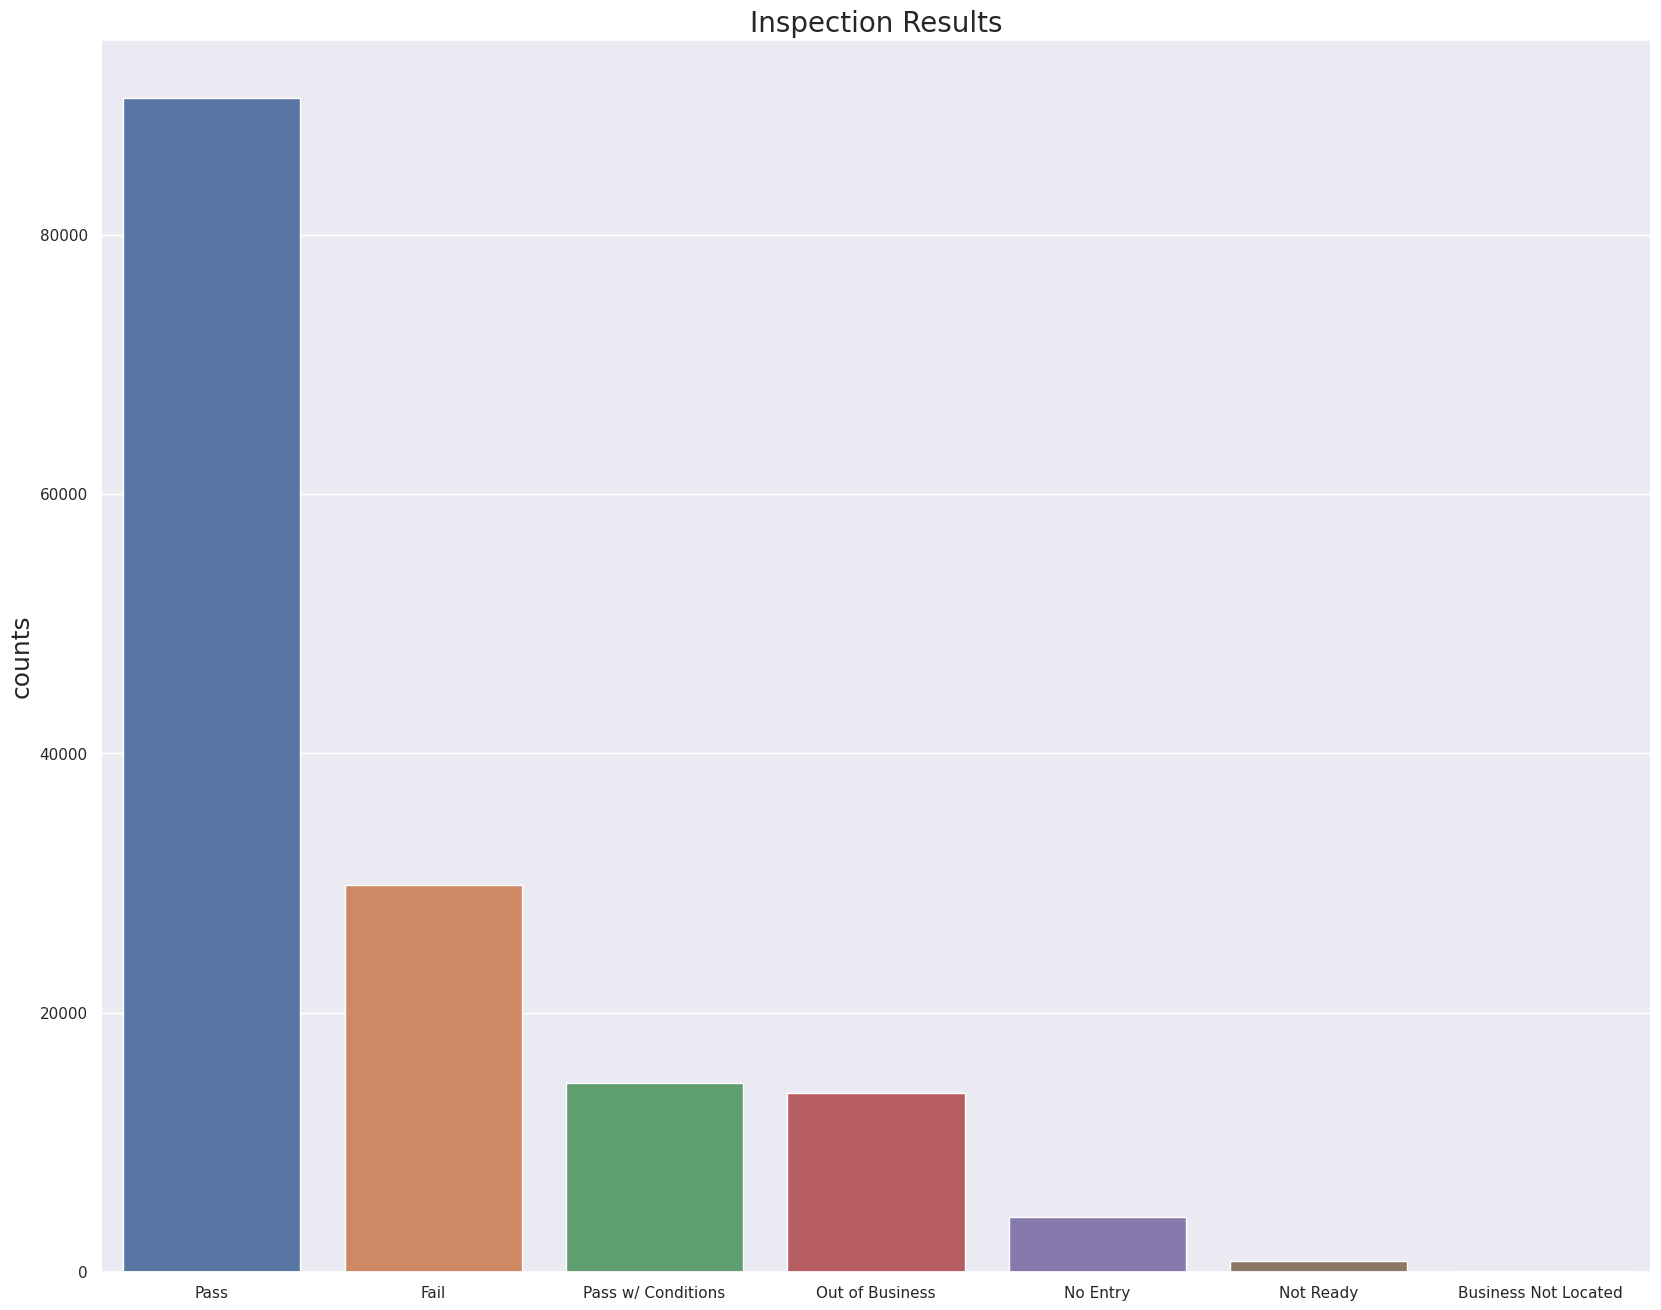

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,16))
x=data.Results.value_counts().index
y=data.Results.value_counts()
sns.barplot(x=x,y=y,ax=ax)
ax.set_title("Inspection Results",size=20)
ax.set_ylabel('counts',size=18)
ax.set_xlabel('')

Text(0, 0.5, 'counts')

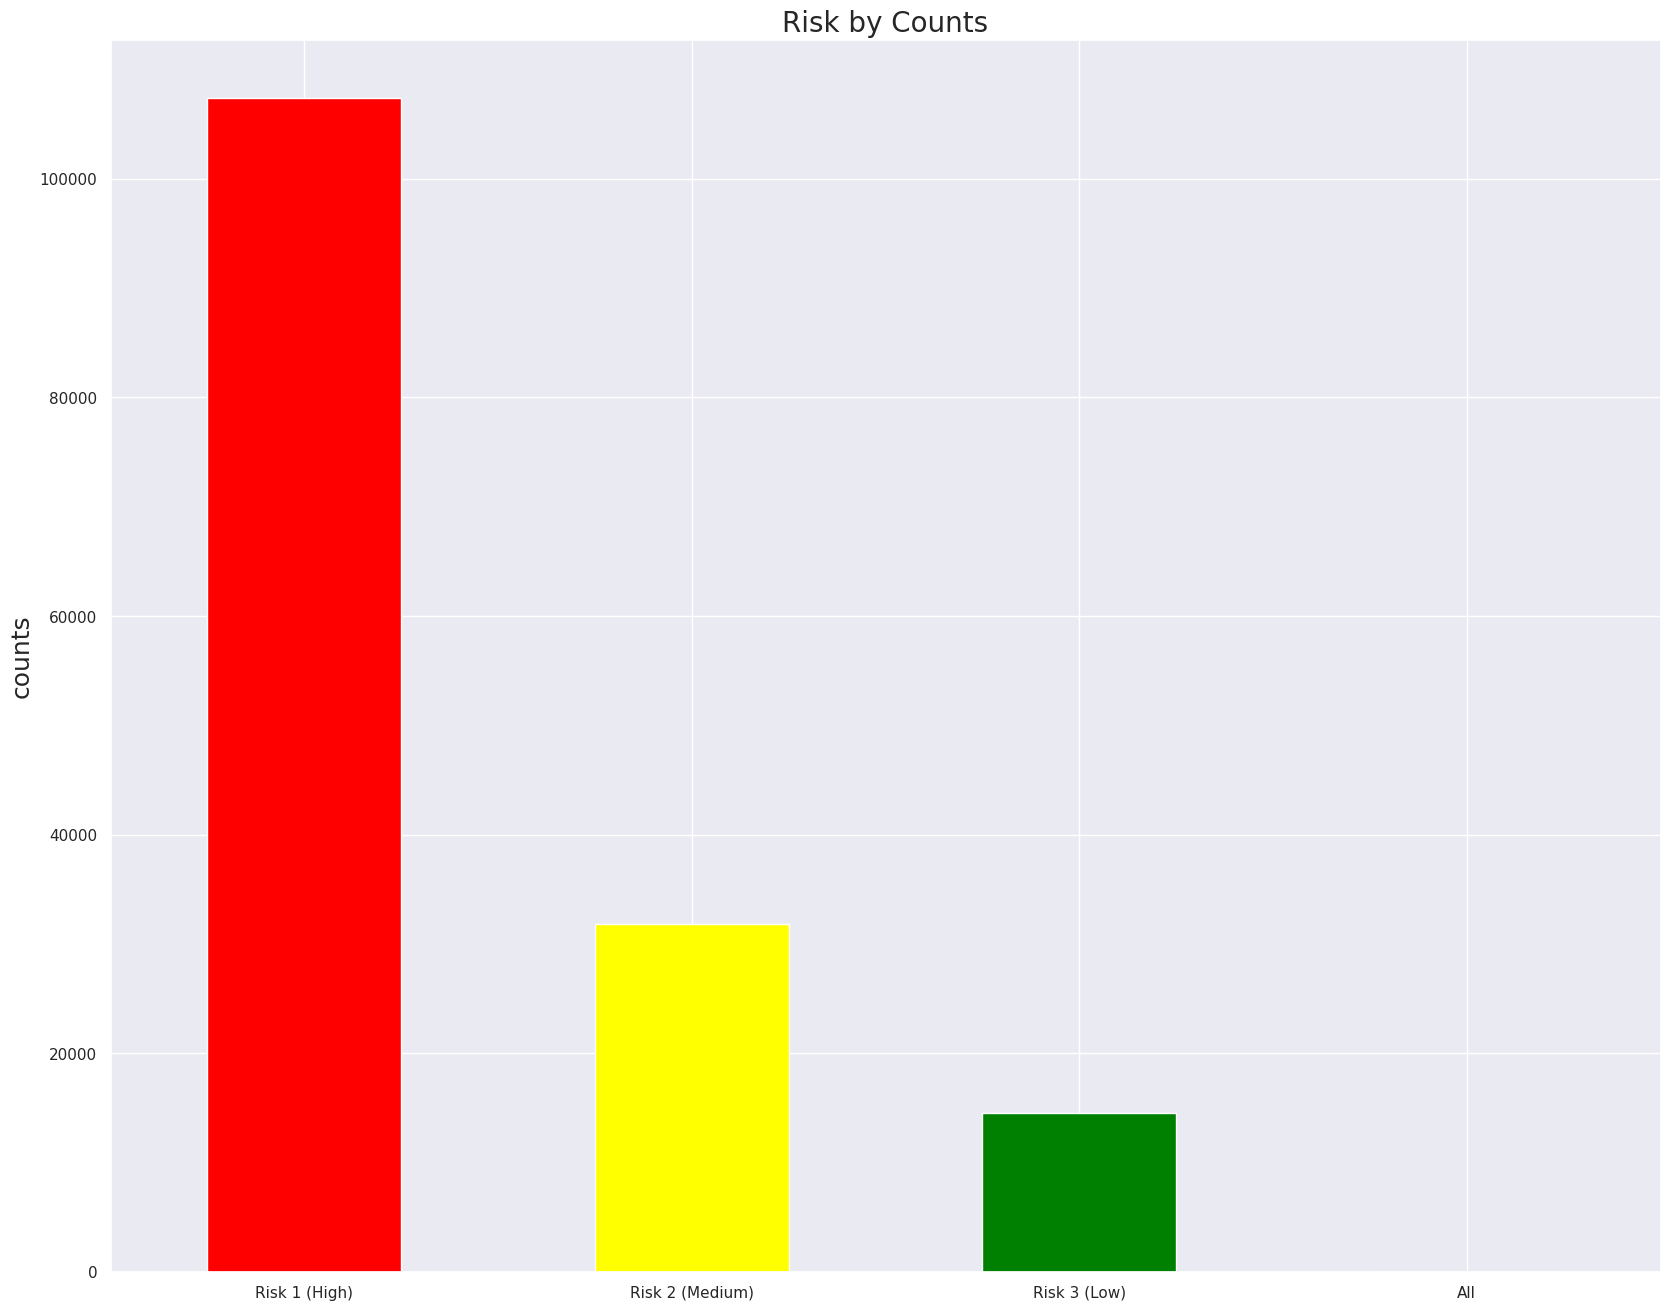

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,16))
data.Risk.value_counts().plot(kind='bar',color=['red','yellow','green'],ax=ax)
ax.tick_params(axis='x',labelrotation=360)
ax.set_title("Risk by Counts", size=20)
ax.set_ylabel("counts", size=18)

### 5. Check if License # is Shared 

In [ ]:
df_1 = _deepnote_execute_sql('SELECT "License #", COUNT(DISTINCT "DBA Name") "Distinct_Business_Count"\nFROM data \nGROUP BY "License #"\nHAVING COUNT(distinct "DBA Name") > 1\nORDER BY 2 DESC ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,License #,Distinct_Business_Count
0,0.0,211
1,14616.0,7
2,NaN,6
3,1354323.0,5
4,1514802.0,4
...,...,...
546,1869321.0,2
547,1932257.0,2
548,1739775.0,2
549,1965073.0,2


### 6. Locations with Multiple different Businesses 

In [ ]:
df_2 = _deepnote_execute_sql('SELECT "Location", COUNT(DISTINCT "License #") "Distinct_Business_Count"\nFROM data \nGROUP BY  "Location"\nHAVING COUNT(DISTINCT "License #") > 1\nORDER BY 2 DESC ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,Location,Distinct_Business_Count
0,"(42.008536400868735, -87.91442843927047)",310
1,"(41.88743405025222, -87.68184949426895)",171
2,None,161
3,"(41.84467072147077, -87.6549622241458)",88
4,"(41.884187507127805, -87.64111966683218)",75
...,...,...
7668,"(41.81426627941673, -87.73601340697145)",2
7669,"(41.85810623692298, -87.6534630311116)",2
7670,"(41.92455395291056, -87.71195340279094)",2
7671,"(41.92356095136802, -87.73912081886603)",2


### 7. Establishment with multiple different Locations

In [ ]:
df_3 = _deepnote_execute_sql('SELECT  "DBA Name", COUNT(DISTINCT "Location") "Distinct_Location_Count"\nFROM data \nGROUP BY   "DBA Name"\nHAVING COUNT(DISTINCT "Location") > 1\nORDER BY 2 DESC ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,DBA Name,Distinct_Location_Count
0,SUBWAY,212
1,DUNKIN DONUTS,153
2,7-ELEVEN,62
3,MCDONALD'S,40
4,CITGO,34
...,...,...
1354,MIS TACOS,2
1355,FUMA LLC,2
1356,U FOOD GRILL,2
1357,THE FLAT TOP GRILL,2


### 8. Establishments with multiple different licenses

In [ ]:
df_4 = _deepnote_execute_sql('SELECT  "DBA Name", COUNT(DISTINCT "License #") "Distinct_License_Count"\nFROM data \nGROUP BY  "DBA Name"\nHAVING COUNT(distinct "License #") > 1\nORDER BY 2 DESC ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_4

,DBA Name,Distinct_License_Count
0,SUBWAY,294
1,DUNKIN DONUTS,172
2,7-ELEVEN,83
3,MCDONALD'S,52
4,"TRIPLE A SERVICES, INC.",52
...,...,...
4820,MIKRUS DELI,2
4821,Walgreens # 07515,2
4822,"WISHCO, INC.",2
4823,CHICAGO PHILLY STEAK,2


### 9. Count of distinct locations

In [ ]:
df_5 = _deepnote_execute_sql('SELECT COUNT(1) Num_Distinct_locations\nFROM (SELECT DISTINCT address,city,state,zip\nFROM data) T', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_5

,Num_Distinct_locations
0,17077


### 10. Count of Distinct Establishments

In [ ]:
df_6 = _deepnote_execute_sql('SELECT COUNT(1)  Num_Distinct_establishments FROM (\nSELECT DISTINCT "License #","DBA Name",COALESCE("AKA Name","DBA Name"),"Address","City","Zip"\nfrom data ) AS T', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_6

,Num_Distinct_establishments
0,34015


### 11. Blank Addresses

In [4]:
df_7 = _deepnote_execute_sql('SELECT Address, * FROM data where TRIM(Address)=\'\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_7

,Address,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address.1,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,,1763245,EAT N RUN CHICKEN AND FISH,EAT N RUN CHICKEN AND FISH,2442868.0,Restaurant,Risk 1 (High),,None,IL,NaN,04/19/2016,License,Not Ready,None,None,None,None
1,,114452,Starfruit Cafe,Starfruit Cafe,2031651.0,None,Risk 2 (Medium),,CHICAGO,IL,60654.0,05/05/2010,License,Fail,None,None,None,None
2,,60405,CASA CENTRAL LA POSADA,CASA CENTRAL LA POSADA,0.0,Restaurant,Risk 1 (High),,None,IL,NaN,04/05/2010,Canvass,Pass,37. TOILET ROOM DOORS SELF CLOSING: DRESSING R...,None,None,None


### 12. Clustering Examples

In [ ]:
df_8 = _deepnote_execute_sql('select distinct city from data where city like \'%CHI%\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_8

,City
0,CHICAGO
1,CCHICAGO
2,CHICAGOCHICAGO
3,312CHICAGO
4,SCHILLER PARK
5,CHCHICAGO
6,CHICAGOI
7,CHICAGO HEIGHTS


In [ ]:
df_9 = _deepnote_execute_sql('select distinct "Inspection Type" from data where "Inspection Type" like \'%1474%\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_9

,Inspection Type
0,Package Liquor 1474
1,license task 1474
2,Task Force for liquor 1474
3,Task force liquor inspection 1474
4,TASK FORCE LIQUOR 1474
5,TASK FORCE PACKAGE GOODS 1474


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c00fda9-e408-45c6-ac1e-09c6fb54e7f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>